In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from simpledbf import Dbf5

In [2]:
# # Configuracion de pandas para mostrar todas las columnas y filas
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.expand_frame_repr', False)
# # Ajustar las opciones de visualización para mostrar todos los elementos del array
# pd.set_option('display.max_seq_items', None)

In [2]:
def verificar_nulos(df):
    """ Verifica la cantidad de valores nulos por columna en un DataFrame """
    nulos = df.isnull().sum()
    return nulos

In [3]:
def detectar_outliers(df, columna):
    """Detecta outliers en una columna de un DataFrame usando el método IQR"""
    # Verificar si hay valores nulos
    if df[columna].isnull().any():
        print(f"La columna '{columna}' contiene valores nulos. Por favor, maneja los valores nulos antes de detectar outliers.")
        return None
    
    # Verificar el tipo de datos
    if not pd.api.types.is_numeric_dtype(df[columna]):
        print(f"La columna '{columna}' no es de tipo numérico.")
        return None
    
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
    
    print(f"Outliers en la columna '{columna}':\n{outliers}")
    return outliers

In [4]:
def cap_outliers(df, columnas, lower_percentile=0.01, upper_percentile=0.99):
    for columna in columnas:
        lower_cap = df[columna].quantile(lower_percentile)
        upper_cap = df[columna].quantile(upper_percentile)
        df.loc[df[columna] < lower_cap, columna] = lower_cap
        df.loc[df[columna] > upper_cap, columna] = upper_cap
    return df

In [5]:
def verificar_duplicados(df, subset_col=None):
    """
    Verifica duplicados en un DataFrame. Si se proporciona `subset_col`, 
    verifica duplicados basándose en esa(s) columna(s).
    
    Parameters:
    df (pd.DataFrame): DataFrame a analizar.
    subset_col (list or str, optional): Columna(s) para basar la verificación de duplicados. 
                                        Si None, se consideran todas las columnas.
                                        
    Returns:
    pd.DataFrame: DataFrame con los duplicados encontrados.
    """
    if subset_col:
        duplicados = df[df.duplicated(subset=subset_col, keep=False)]
    else:
        duplicados = df[df.duplicated(keep=False)]
    
    print(f"Duplicados encontrados ({len(duplicados)}):")
    return duplicados

In [6]:
def eliminar_duplicados(df, subset=None, keep='first'):
    """
    Elimina duplicados del dataframe

    Parámetros:
    df (pd.DataFrame): El DataFrame del que se eliminarán los duplicados.

    subset (list, opcional): Columnas en las que buscar duplicados. Si no se especifica, se usan todas las columnas.
    
    keep (str, opcional): Qué duplicado conservar ('first', 'last', o False para eliminar todos). Por defecto es 'first'.
    """
    df = df.drop_duplicates()
    return df

In [8]:
def normalizar_columnas(df):
    """
    Convierte los nombres de todas las columnas de un DataFrame a minúsculas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame cuyas columnas serán normalizadas.
    
    Retorna:
    pandas.DataFrame: El DataFrame con los nombres de las columnas en minúsculas.
    """
    df.columns = [str(col).strip().lower() for col in df.columns]  # Convertir a string y luego a minúsculas
    return df

## Unificacion de los datos de taxis_trips por meses

In [9]:
# # Define la ruta de la carpeta donde están los archivos
# carpeta = "../Datasets/"
# # Lista de los archivos específicos que necesitas unir
# archivos = ["yellow_tripdata_2024-01.parquet", "yellow_tripdata_2024-02.parquet", "yellow_tripdata_2024-03.parquet", "yellow_tripdata_2024-04.parquet", "yellow_tripdata_2024-05.parquet", "yellow_tripdata_2024-06.parquet"]

In [10]:
# # Leer los archivos y concatenarlos en un solo DataFrame
# taxis_trip = pd.concat([pd.read_parquet(os.path.join(carpeta, archivo)) for archivo in archivos])

# # Opcional: agregar una columna 'mes' para indicar de qué mes proviene cada registro
# taxis_trip['mes'] = pd.to_datetime(taxis_trip['tpep_pickup_datetime']).dt.month

* No se une los datos ya que son muy grandes y procesarlos de manera local tarda mucho tiempo y consume muchos recursos.

In [10]:
taxis = pd.read_parquet("../../Datasets/yellow_tripdata_2024-01.parquet")

In [11]:
taxis = normalizar_columnas(taxis)

In [12]:
# Verificamos nulos
verificar_nulos(taxis)

vendorid                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
ratecodeid               140162
store_and_fwd_flag       140162
pulocationid                  0
dolocationid                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
airport_fee              140162
dtype: int64

In [13]:
taxis.dropna(inplace=True)

In [15]:
# Se hace verifica solo una muestra ya que la data es muy grande y el procesamiento es muy lento
#df_sample = taxis_trip.sample(n=1000, random_state=1)
#taxis_trip = detectar_outliers(taxis_trip, 'trip_distance')

In [16]:
#taxis = cap_outliers(taxis, ['trip_distance'], 0.01)

In [14]:
verificar_duplicados(taxis)

Duplicados encontrados (0):


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


In [15]:
# Convertir todos los valores negativos a positivos usando abs() ya que hay valores negativos que pueden ser errores en los datos
taxis['total_amount'] = taxis['total_amount'].abs()
taxis['airport_fee'] = taxis['airport_fee'].abs()
taxis['extra'] = taxis['extra'].abs()
taxis['mta_tax'] = taxis['mta_tax'].abs()
taxis['improvement_surcharge'] = taxis['improvement_surcharge'].abs()
taxis['tip_amount'] = taxis['tip_amount'].abs()
taxis['tolls_amount'] = taxis['tolls_amount'].abs()
taxis['fare_amount'] = taxis['fare_amount'].abs()
taxis['congestion_surcharge'] = taxis['congestion_surcharge'].abs()

In [16]:
# Y con estas variables haremos el analisis del los datos
columns = ['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount']
taxis_trip = taxis[columns]

In [17]:
taxis_trip.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,186,79,2,17.7,1.0,0.00,0.0,22.70
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,140,236,1,10.0,3.5,3.75,0.0,18.75
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,236,79,1,23.3,3.5,3.00,0.0,31.30
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,79,211,1,10.0,3.5,2.00,0.0,17.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,211,148,1,7.9,3.5,3.20,0.0,16.10


In [18]:
taxis_trip.describe()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
count,2.824462e+06,2824462,2824462,2.824462e+06,2.824462e+06,2.824462e+06,2.824462e+06,2.824462e+06,2.824462e+06,2.824462e+06,2.824462e+06,2.824462e+06,2.824462e+06
mean,1.758794e+00,2024-01-17 01:05:51.479761,2024-01-17 01:21:27.433029,1.339281e+00,3.254071e+00,1.662218e+02,1.654877e+02,1.218898e+00,1.858716e+01,1.540455e+00,3.425145e+00,5.479499e-01,2.748318e+01
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2024-01-09 15:31:44,2024-01-09 15:48:48.250000,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.540000e+01
50%,2.000000e+00,2024-01-17 10:36:41,2024-01-17 10:55:22,1.000000e+00,1.670000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,2.800000e+00,0.000000e+00,2.012000e+01
75%,2.000000e+00,2024-01-24 18:44:19,2024-01-24 18:59:22,1.000000e+00,3.100000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,4.200000e+00,0.000000e+00,2.856000e+01
max,2.000000e+00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,1.540032e+04,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+03,1.425000e+01,4.280000e+02,1.159200e+02,5.000000e+03
std,4.278150e-01,NaN,NaN,8.502817e-01,1.213204e+01,6.319553e+01,6.919925e+01,5.328322e-01,1.870557e+01,1.797452e+00,3.918464e+00,2.141242e+00,2.296958e+01


* Se encontro datos que no concuerdan en las columnas de 'trip_distance' y 'total_amount' entre otras esto se debe a que hay distacias recorridas de 0 y valores positivos en la columna de cobro total ademas de otras columnas relacionadas a cobros por lo cual se va a tratar de corregir para mejorar las graficas y analisis de los datos.

In [19]:
# Contar los registros donde trip_distance y total_amount son cero
zero_distance_zero_amount = taxis_trip[(taxis_trip['trip_distance'] == 0.0) | (taxis_trip['total_amount'] == 0.0)]
count_zero_distance_zero_amount = zero_distance_zero_amount.shape[0]

print(f"Cantidad de registros con trip_distance y total_amount igual a cero: {count_zero_distance_zero_amount}")

Cantidad de registros con trip_distance y total_amount igual a cero: 37669


In [20]:
# Eliminar estos registros si la cantidad es pequeña
if count_zero_distance_zero_amount < 50000:  # Ajusta este umbral según tus necesidades
    taxis_trip = taxis_trip[~((taxis_trip['trip_distance'] == 0.0) | (taxis_trip['total_amount'] == 0.0))]

In [21]:
taxis_trip.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,186,79,2,17.7,1.0,0.00,0.0,22.70
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,140,236,1,10.0,3.5,3.75,0.0,18.75
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,236,79,1,23.3,3.5,3.00,0.0,31.30
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,79,211,1,10.0,3.5,2.00,0.0,17.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,211,148,1,7.9,3.5,3.20,0.0,16.10


In [22]:
# Leemos la Data
dbf = Dbf5("../../Datasets/taxi_zones.dbf")
dbf.to_csv("../../Datasets/taxi_zones1.csv")

In [24]:
# Los convertimos en dfs
taxi_zones = pd.read_csv("../../Datasets/taxi_zones1.csv")
taxi_lookup = pd.read_csv("../../Datasets/taxi+_zone_lookup.csv")

In [25]:
verificar_nulos(taxi_zones)

OBJECTID      0
Shape_Leng    0
Shape_Area    0
zone          0
LocationID    0
borough       0
dtype: int64

In [26]:
verificar_duplicados(taxi_zones)

Duplicados encontrados (4751):


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357453189,0.0007823067885,Newark Airport,1,EWR
1,2,0.43346966679,0.00486634037837,Jamaica Bay,2,Queens
2,3,0.0843411059012,0.000314414156821,Allerton/Pelham Gardens,3,Bronx
3,4,0.0435665270921,0.000111871946192,Alphabet City,4,Manhattan
4,5,0.0921464898574,0.000497957489363,Arden Heights,5,Staten Island
...,...,...,...,...,...,...
4746,259,0.126750305191,0.000394552487366,Woodlawn/Wakefield,259,Bronx
4747,260,0.133514154636,0.000422345326907,Woodside,260,Queens
4748,261,0.0271204563616,3.43423231652e-05,World Trade Center,261,Manhattan
4749,262,0.0490636231541,0.000122330270966,Yorkville East,262,Manhattan


In [27]:
taxi_zones = normalizar_columnas(taxi_zones)

In [28]:
taxi_zones.head(3)

,objectid,shape_leng,shape_area,zone,locationid,borough
0,1,0.116357453189,0.0007823067885,Newark Airport,1,EWR
1,2,0.43346966679,0.00486634037837,Jamaica Bay,2,Queens
2,3,0.0843411059012,0.000314414156821,Allerton/Pelham Gardens,3,Bronx


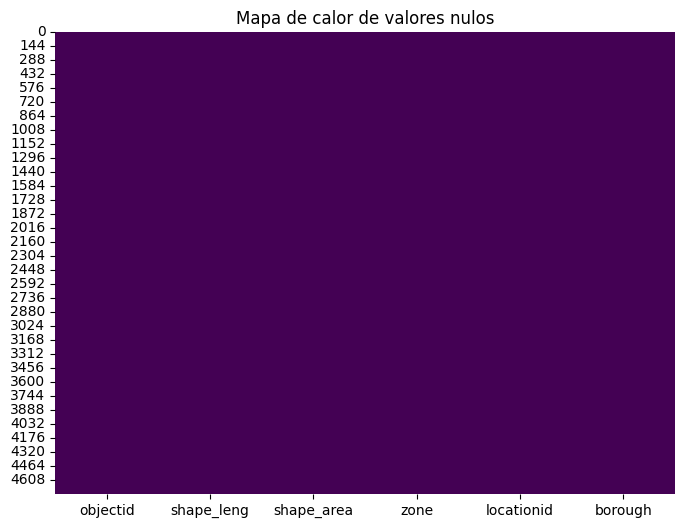

In [29]:
# Verificacion y grafica de nulos
plt.figure(figsize=(8, 6))
sns.heatmap(taxi_zones.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [30]:
verificar_nulos(taxi_lookup)

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

In [31]:
verificar_duplicados(taxi_lookup).sum()

Duplicados encontrados (0):


LocationID      0
Borough         0
Zone            0
service_zone    0
dtype: object

In [32]:
taxi_lookup = normalizar_columnas(taxi_lookup)

In [33]:
taxi_lookup.head(2)

,locationid,borough,zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone


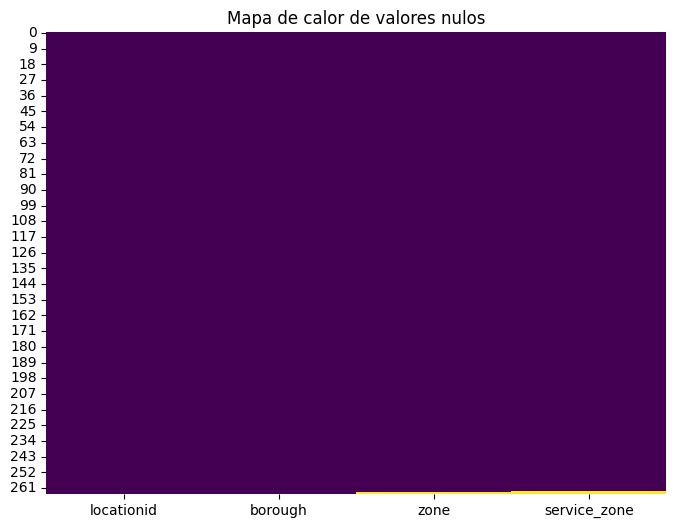

In [34]:
# Verificacion y grafica de nulos
plt.figure(figsize=(8, 6))
sns.heatmap(taxi_lookup.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

* Para usar estos datos lo que haremos sera, usar la colunma de 'OBJECTID' para hacer un join y tener cada viaje con su zona

In [35]:
# Eliminar filas donde 'objectid' es 'OBJECTID'
taxi_zones = taxi_zones[taxi_zones['objectid'] != 'OBJECTID']

# Convertir 'objectid' a entero si es una cadena
taxi_zones['objectid'] = taxi_zones['objectid'].astype(int)

In [36]:
# Aqui haces un merge para unir las tablas y nos quede el nombre de las zonas 
taxis_trip= pd.merge(taxis_trip, taxi_zones, left_on='pulocationid', right_on='objectid', how='left')

In [37]:
taxis_trip.head(2)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,objectid,shape_leng,shape_area,zone,locationid,borough
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,186,79,2,17.7,1.0,0.0,0.0,22.7,186.0,0.0246963902234,3.70729416953e-05,Penn Station/Madison Sq West,186,Manhattan
1,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,186,79,2,17.7,1.0,0.0,0.0,22.7,186.0,0.0246963902234,3.70729416953e-05,Penn Station/Madison Sq West,186,Manhattan


In [38]:
# Borramos los dato que no vamos a utilizar
taxis_trip = taxis_trip.drop(columns=['objectid', 'shape_leng', 'shape_area', 'locationid', 'extra', 'tip_amount', 'tolls_amount'], axis=1)

In [39]:
verificar_nulos(taxis_trip)

vendorid                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
pulocationid                 0
dolocationid                 0
payment_type                 0
fare_amount                  0
total_amount                 0
zone                     10027
borough                  10027
dtype: int64

In [40]:
taxis_trip.dropna(inplace=True)

In [41]:
# Ahora  las variables 'payment_type' y 'VendorID' les asginamos sus respectivas categorias 

VendorID= {1:'Creative Mobile Technologies, LLC',
        2:'VeriFone Inc'}

payment_type= {1:'Credit card',2:'Cash',3:'No charge',
        4:'Dispute', 5:'Unknown', 6:'Trip cancelled'}

taxis_trip['vendorid']= taxis_trip['vendorid'].replace(VendorID)
taxis_trip['payment_type']= taxis_trip['payment_type'].replace(payment_type)

In [42]:
taxis_trip.head(2)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,fare_amount,total_amount,zone,borough
0,VeriFone Inc,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,186,79,Cash,17.7,22.7,Penn Station/Madison Sq West,Manhattan
1,VeriFone Inc,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,186,79,Cash,17.7,22.7,Penn Station/Madison Sq West,Manhattan


In [43]:
# Aplicamos la regla empirica a las varaibles numericas mediante un for
# columns=['passenger_count','trip_distance','fare_amount']

# for column in columns:
#     media= datos[column].mean()
#     desviacion= datos[column].std()

#     limite_inferior= media - 2 * desviacion
#     limite_superior= media + 2 * desviacion

#     datos= datos[(datos[column]>=limite_inferior) & (datos[column]<=limite_superior)]

## Duracion de viajes

In [44]:
# Convertir los tiempos de recogida y entrega a formato datetime
taxis_trip['tpep_pickup_datetime'] = pd.to_datetime(taxis_trip['tpep_pickup_datetime'])
taxis_trip['tpep_dropoff_datetime'] = pd.to_datetime(taxis_trip['tpep_dropoff_datetime'])

# Crear una columna para la duración del viaje en minutos
taxis_trip['trip_duration'] = (taxis_trip['tpep_dropoff_datetime'] - taxis_trip['tpep_pickup_datetime']).dt.total_seconds() / 60

# Crear una columna para la hora de recogida
taxis_trip['pickup_hour'] = taxis_trip['tpep_pickup_datetime'].dt.hour

# 1. Duración promedio de viajes por hora
duration_by_hour = taxis_trip.groupby('pickup_hour')['trip_duration'].mean()

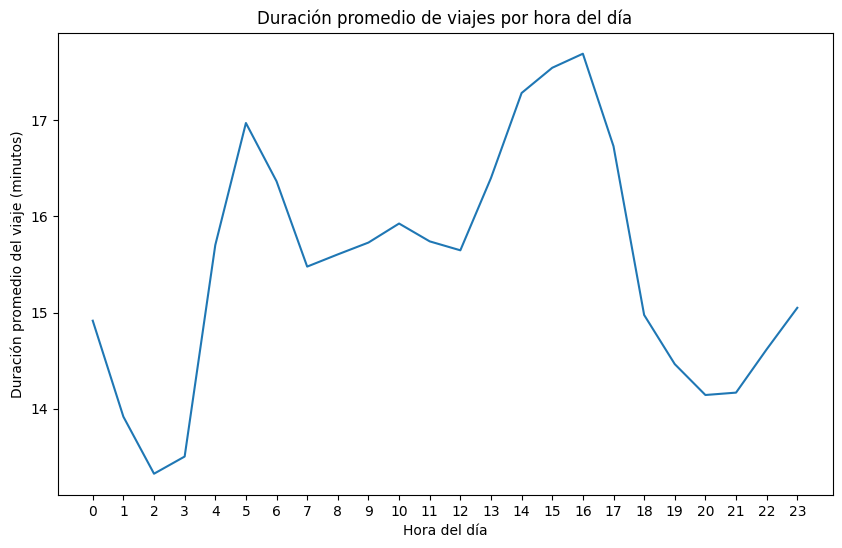

In [45]:
plt.figure(figsize=(10,6))
sns.lineplot(x=duration_by_hour.index, y=duration_by_hour.values)
plt.title('Duración promedio de viajes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Duración promedio del viaje (minutos)')
plt.xticks(range(0, 24))
plt.show()

## Análisis de la duración del viaje según la hora y costos dependiendo de la distancia

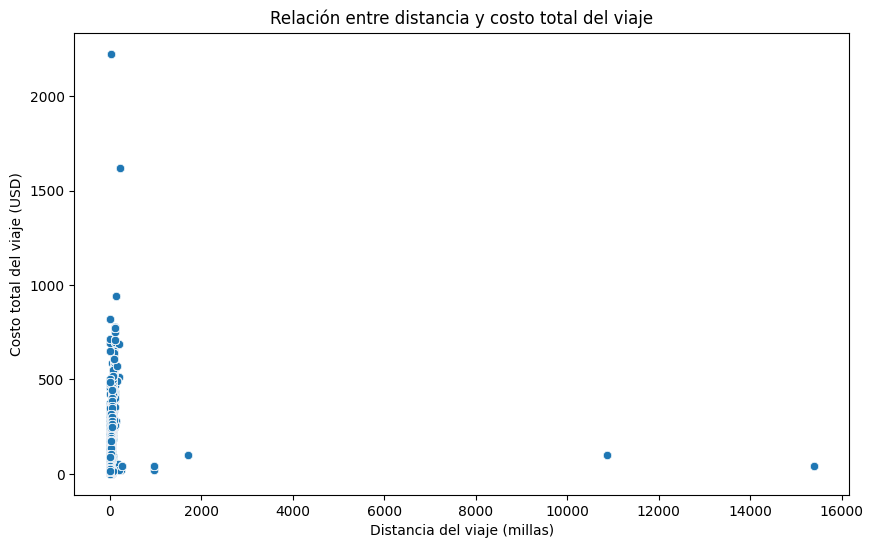

In [46]:
# 2. Gráfico de dispersión de distancia vs costo total
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_distance', y='total_amount', data=taxis_trip)
plt.title('Relación entre distancia y costo total del viaje')
plt.xlabel('Distancia del viaje (millas)')
plt.ylabel('Costo total del viaje (USD)')
plt.show()

C:\Users\Andres\AppData\Local\Temp\ipykernel_18372\1938476504.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_by_distance = taxis_trip.groupby('distance_bin')['total_amount'].mean()


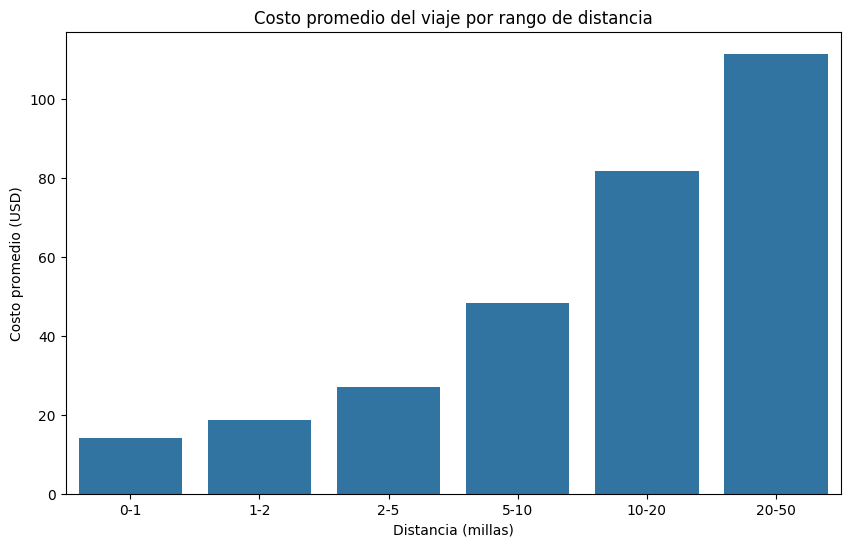

In [47]:
taxis_trip['distance_bin'] = pd.cut(taxis_trip['trip_distance'], bins=[0, 1, 2, 5, 10, 20, 50], labels=['0-1', '1-2', '2-5', '5-10', '10-20', '20-50'])
cost_by_distance = taxis_trip.groupby('distance_bin')['total_amount'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=cost_by_distance.index, y=cost_by_distance.values)
plt.title('Costo promedio del viaje por rango de distancia')
plt.xlabel('Distancia (millas)')
plt.ylabel('Costo promedio (USD)')
plt.show()

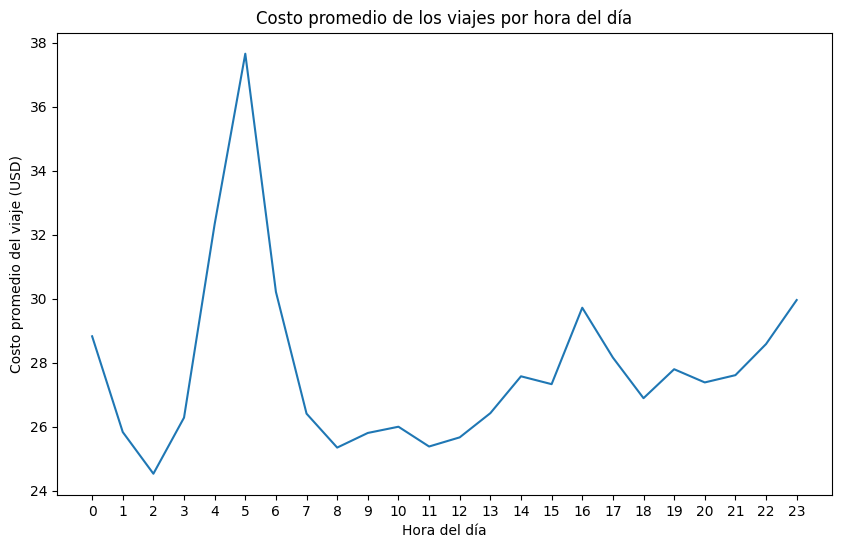

In [48]:
# 4. Costo promedio de los viajes por hora del día
cost_by_hour = taxis_trip.groupby('pickup_hour')['total_amount'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=cost_by_hour.index, y=cost_by_hour.values)
plt.title('Costo promedio de los viajes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Costo promedio del viaje (USD)')
plt.xticks(range(0, 24))
plt.show()

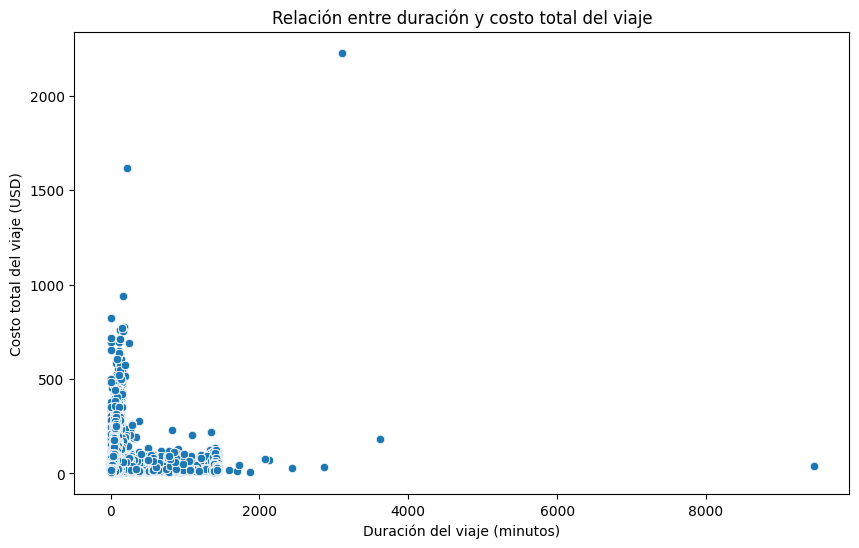

In [49]:
# Gráfico de dispersión de duración vs costo total
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_duration', y='total_amount', data=taxis_trip)
plt.title('Relación entre duración y costo total del viaje')
plt.xlabel('Duración del viaje (minutos)')
plt.ylabel('Costo total del viaje (USD)')
plt.show()


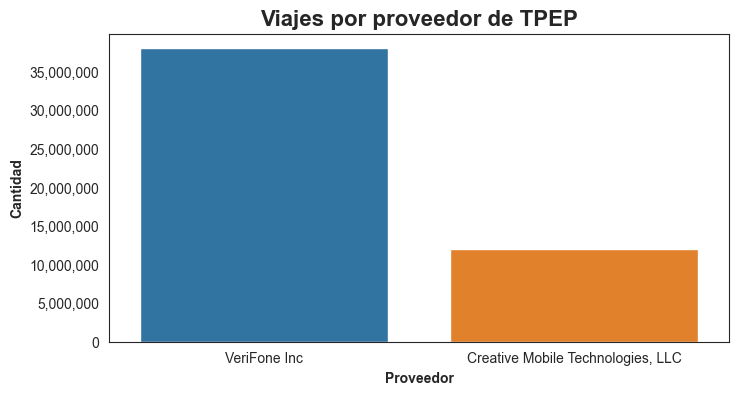

In [50]:
# Definimos el estilo
sns.set_style('white')
# Definimos el tamaño de la figura 
plt.figure(figsize=(8,4))

ax = sns.countplot(data=taxis_trip, x='vendorid', hue='vendorid')
plt.title('Viajes por proveedor de TPEP',fontweight='bold', fontsize=16)
plt.xlabel('Proveedor',fontweight='bold')
plt.ylabel('Cantidad',fontweight='bold')
# Seteamos el eje de las y para mostras los valores en su forma completa 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

In [344]:
# # Convertir las columnas de fechas al formato datetime
# taxis_trip['tpep_pickup_datetime'] = pd.to_datetime(taxis_trip['tpep_pickup_datetime'])
# taxis_trip['tpep_dropoff_datetime'] = pd.to_datetime(taxis_trip['tpep_dropoff_datetime'])

# # Crear las columnas 'hora_inicio' y 'hora_fin' extrayendo la hora de las columnas datetime
# taxis_trip['trip_start_time'] = taxis_trip['tpep_pickup_datetime'].dt.time
# taxis_trip['trip_end_time'] = taxis_trip['tpep_dropoff_datetime'].dt.time

# # Actualizar las columnas para que contengan solo la parte de la fecha
# taxis_trip['tpep_pickup_datetime'] = taxis_trip['tpep_pickup_datetime'].dt.date
# taxis_trip['tpep_dropoff_datetime'] = taxis_trip['tpep_dropoff_datetime'].dt.date


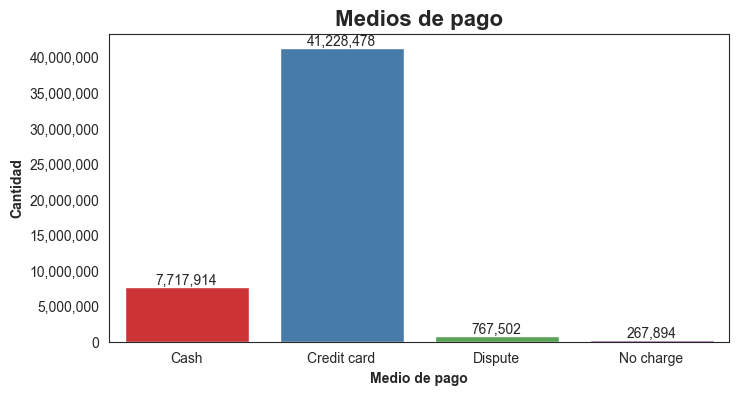

In [51]:
# Definimos el estilo 
sns.set_style('white')

# Definimos el tamaño 
plt.figure(figsize=(8,4))

ax = sns.countplot(data=taxis_trip, x='payment_type', hue='payment_type', palette='Set1')
plt.title('Medios de pago',fontweight='bold', fontsize=16)
plt.xlabel('Medio de pago',fontweight='bold')
plt.ylabel('Cantidad',fontweight='bold')

# Seteamos el eje de las y para mostras los valores en su forma completa
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Usamos un for para crear las etiquetas que muestras las observaciones por barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostramos el grafico 
plt.show()

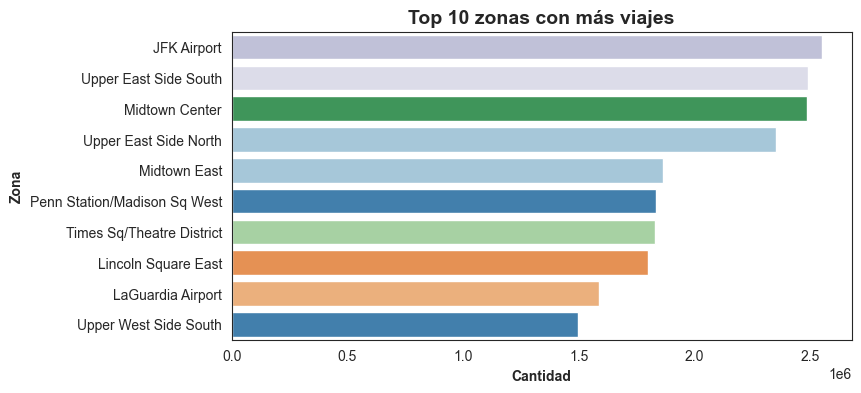

In [52]:
# Definimos el estilo 
sns.set_style('white')
# Creamo un orden para las barras
orden= taxis_trip['zone'].value_counts().index[:10]
# Definimos el tamaño 
plt.figure(figsize=(8,4))

ax = sns.countplot(data=taxis_trip, y='zone', hue='zone',palette="tab20c",order=orden) 
plt.title('Top 10 zonas con más viajes',fontweight='bold', fontsize=14)
plt.xlabel('Cantidad',fontweight='bold')
plt.ylabel('Zona',fontweight='bold')
plt.show()

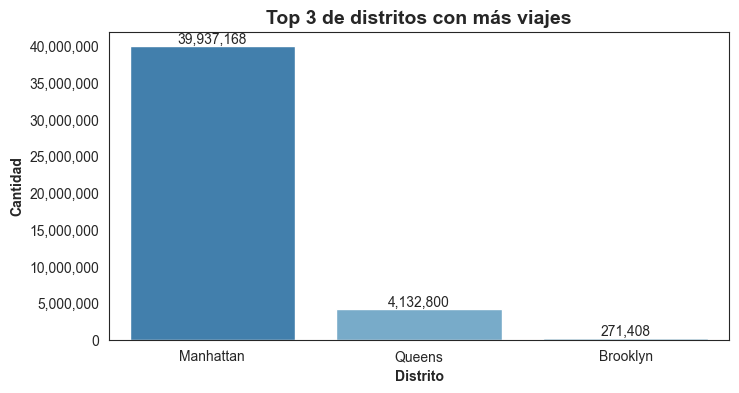

In [61]:
# Definimos el estilo 
sns.set_style('white')
# Definimos el tamaño 
plt.figure(figsize=(8,4))
# Creamo un orden para las barras
orden= taxis_trip['borough'].value_counts().index[:3]

ax = sns.countplot(data=taxis_trip, x='borough', hue='borough',palette="tab20c", order= orden)
plt.title('Top 3 de distritos con más viajes',fontweight='bold', fontsize=14)
plt.xlabel('Distrito',fontweight='bold')
plt.ylabel('Cantidad',fontweight='bold')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Usamos un for para crear las etiquetas que muestras las observaciones por barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

* Analizamos la correlacion entre las variables

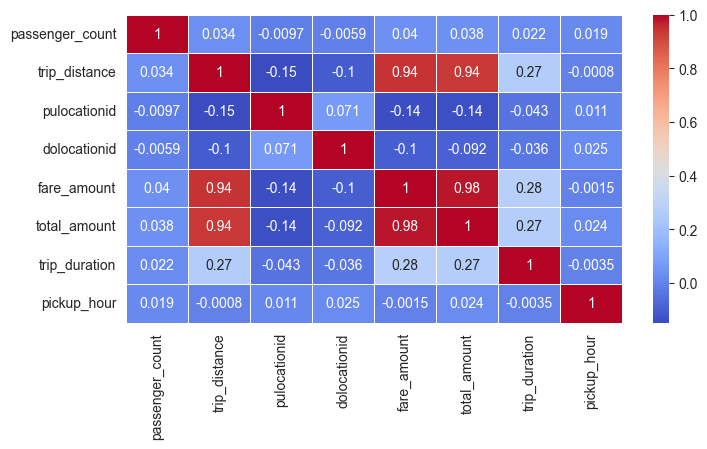

In [60]:
# Definimos el estilo 
sns.set_style('white')

# Definimos el tamaño 
plt.figure(figsize=(8,4))

# Definimos el grafico y los datos a usar 
ax = sns.heatmap(taxis_trip.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Mostramos la grafica
plt.show()

In [53]:
taxis_trip.to_parquet("taxis_clean.parquet", index=False, compression="snappy")